# Aventura Pokemon
https://docs.google.com/presentation/d/19_ApyTzkzjZ_7K2yr9EVHZgs4-xFdVy9nsGDw7xXUDk/edit?usp=sharing

    Daniel Zubieta Ambriz A01651206 https://github.com/Dazuam/SistemasInteligentes
    Carlos Aguirre Orozco A01336319 https://github.com/Lucer9/Sistemas-
    Axel Octavio Meinguer Estrada A01653448 https://github.com/alupusmc/SistemasInteligentes
    Alister Estrada Cueto A01336767 https://github.com/AlisterEstrada/SistemasInteligente
    
    
    
    


# Exploratory Data Analysis

We begin by importing the proper libraries, files and taking a look at what we're dealing with, 

In [172]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 

random.seed(1)
# Import the dataset
pokemon = pd.read_csv("pokemon (1).csv")
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [173]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,272,252,272
1,280,252,280
2,281,252,252
3,311,252,311
4,312,252,252


In [174]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (6497, 3)


In [175]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

In [176]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset

pokemon = pokemon[pokemon.Generation.isin([3, 4])].copy()
pokemon.Generation.unique()
pokemon.shape


mega_filter = (pokemon.Name.str.contains('Mega ')) #Put a space there to exclude meganium which is a legit second generation pokemon
pokemon = pokemon[~mega_filter]
primal_filter = (pokemon.Name.str.contains('Primal')) #Put a space there to exclude meganium which is a legit second generation pokemon
pokemon = pokemon[~primal_filter]

pokemon.loc[pokemon['Type 1'] == "Fairy", 'Type 1'] = 'Normal'
pokemon.loc[pokemon['Type 2'] == "Fairy", 'Type 2'] = np.nan

results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')



# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]


,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
321,322,Hariyama,Fighting,NaN,144,120,60,40,60,50,3,False,4,4,NaN,NaN
478,479,Honchkrow,Dark,Flying,100,125,52,105,52,71,4,False,8,8,NaN,NaN
552,553,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,4,4,NaN,NaN


## Find the top 10 Pokemon with the worse win percentage

In [127]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,1.0,1.0,44.0,0.022727
398,399,Spheal,Ice,Water,70,40,50,55,50,25,3,False,1.0,1.0,40.0,0.025000
296,297,Seedot,Grass,NaN,40,40,50,30,30,30,3,False,2.0,2.0,52.0,0.038462
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,2.0,2.0,52.0,0.038462
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,2.0,2.0,49.0,0.040816
444,445,Bidoof,Normal,NaN,59,45,40,35,40,31,4,False,2.0,2.0,43.0,0.046512
446,447,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,3.0,3.0,47.0,0.063830
323,324,Nosepass,Rock,NaN,30,45,135,45,90,30,3,False,4.0,4.0,57.0,0.070175
455,456,Shieldon,Rock,Steel,30,42,118,42,88,30,4,False,3.0,3.0,37.0,0.081081
488,489,Happiny,Normal,NaN,100,5,5,15,65,30,4,False,3.0,3.0,35.0,0.085714


## Find the top 10 Pokemon with the best win percentage

In [128]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,47.0,47.0,47.0,1.000000
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,3,True,45.0,45.0,46.0,0.978261
480,481,Purugly,Normal,NaN,71,82,64,64,59,112,4,False,44.0,44.0,45.0,0.977778
551,552,Shaymin Sky Forme,Grass,Flying,100,103,75,120,75,127,4,True,34.0,34.0,35.0,0.971429
313,314,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,53.0,53.0,55.0,0.963636
549,550,Darkrai,Dark,NaN,70,90,90,135,90,125,4,True,44.0,44.0,46.0,0.956522
550,551,Shaymin Land Forme,Grass,NaN,100,100,100,100,100,100,4,True,40.0,40.0,42.0,0.952381
338,339,Manectric,Electric,NaN,70,75,60,105,60,105,3,False,38.0,38.0,40.0,0.950000
315,316,Ninjask,Bug,Flying,61,90,45,50,50,160,3,False,37.0,37.0,39.0,0.948718
431,432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,3,True,49.0,49.0,52.0,0.942308



## Basic statistics of the data 

In [129]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,251.000000,251.000000,251.000000,251.000000
mean,415.492126,68.531496,76.748031,72.807087,71.594488,71.149606,66.342520,3.456693,22.131474,22.131474,45.892430,0.480568
std,81.951385,25.329703,30.942499,31.496129,30.460058,29.027200,28.762157,0.499104,12.779775,12.779775,6.838156,0.260819
min,273.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,1.000000,1.000000,27.000000,0.022727
25%,345.250000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,3.000000,11.000000,11.000000,41.000000,0.260558
50%,416.500000,65.000000,75.000000,67.000000,68.500000,65.000000,65.000000,3.000000,21.000000,21.000000,46.000000,0.452830
75%,485.750000,80.000000,95.000000,90.000000,92.000000,90.000000,85.750000,4.000000,31.500000,31.500000,50.000000,0.674709
max,553.000000,170.000000,180.000000,200.000000,180.000000,200.000000,180.000000,4.000000,57.000000,57.000000,67.000000,1.000000



## Visualizing the Data



Text(0.5, 1.0, 'Total Pokemon by Type 1')

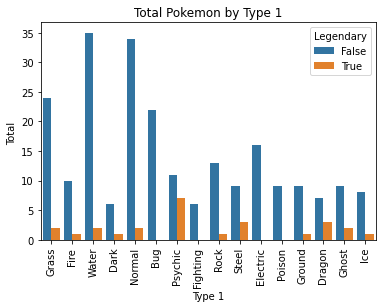

In [130]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

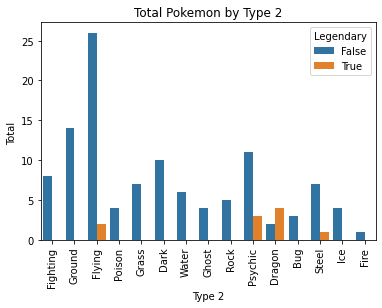

In [131]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [132]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Rock,0.300469
Bug,0.356449
Steel,0.383553
Ice,0.401126
Ghost,0.426911
Water,0.434392
Grass,0.460718
Poison,0.470444
Fire,0.471979


## Seaborn Pairplot

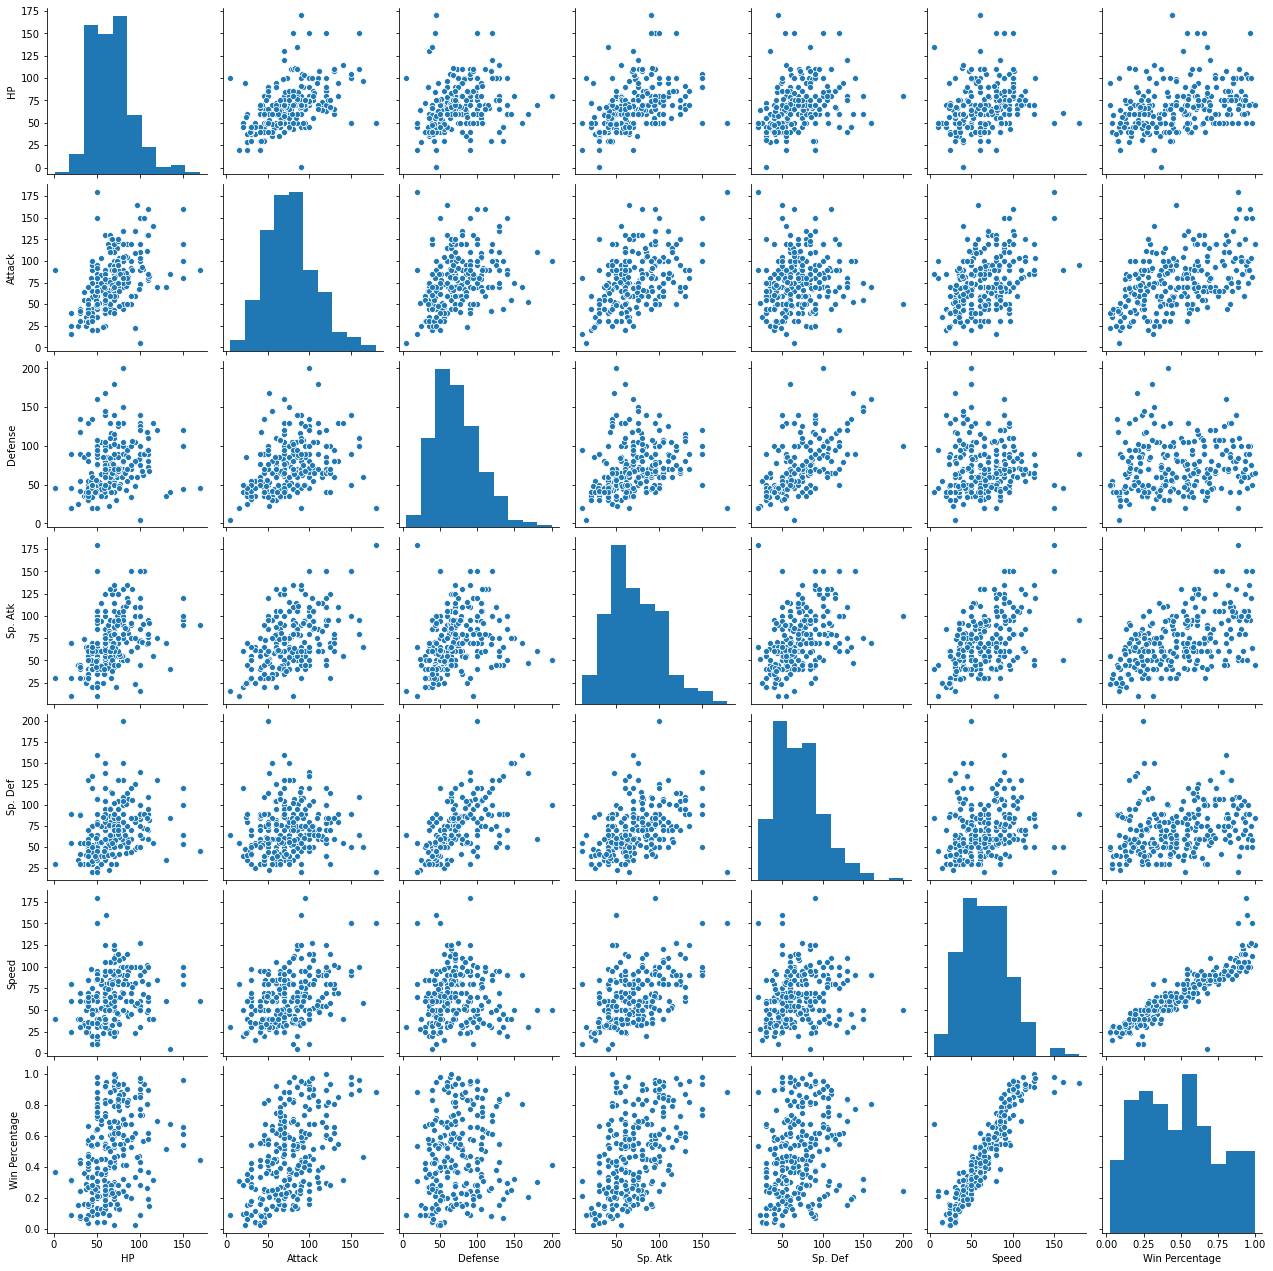

In [133]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

### Seaborn PairGrid

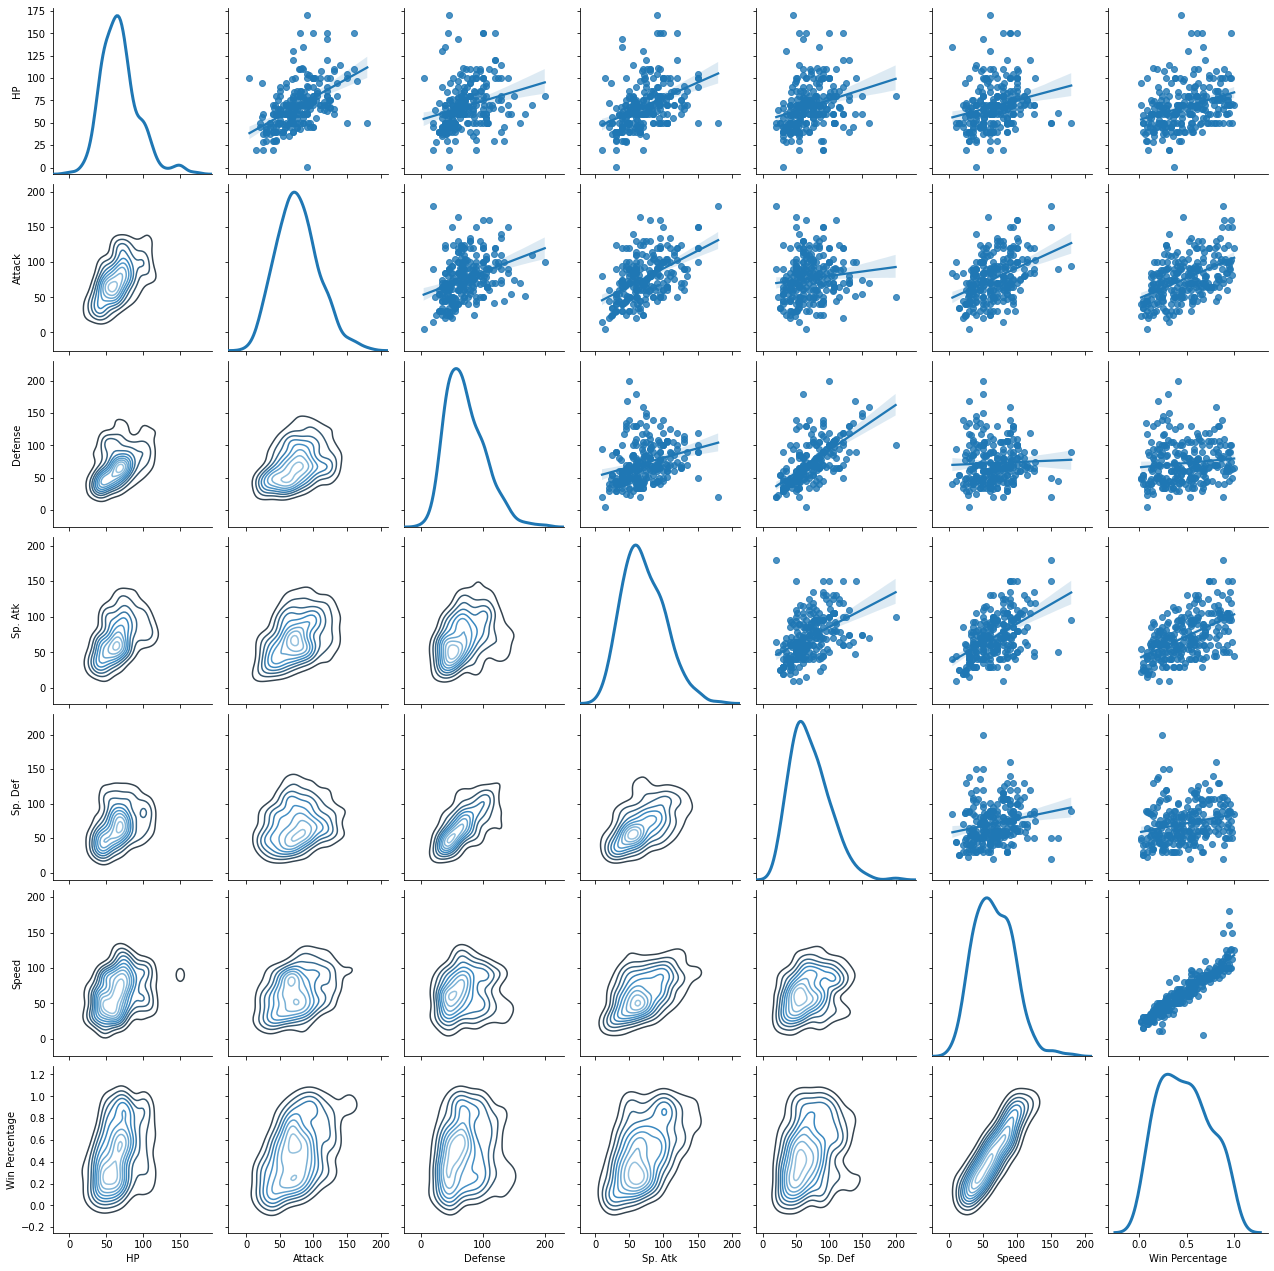

In [134]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

In [135]:
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.512324,0.260265,0.405643,0.272176,0.230522,0.326432
Attack,0.512324,1.000000,0.345294,0.496345,0.119071,0.412776,0.491619
Defense,0.260265,0.345294,1.000000,0.281793,0.641565,0.041397,0.112873
Sp. Atk,0.405643,0.496345,0.281793,1.000000,0.464670,0.518953,0.528756
Sp. Def,0.272176,0.119071,0.641565,0.464670,1.000000,0.204000,0.235945
Speed,0.230522,0.412776,0.041397,0.518953,0.204000,1.000000,0.909501
Win Percentage,0.326432,0.491619,0.112873,0.528756,0.235945,0.909501,1.000000


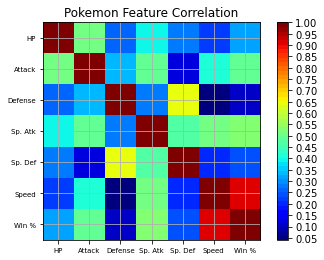

In [137]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results3.loc[:,col])

The table and the correlation figure provide the exact same information. The figure with colors is more pleasant to look at and when discussing results with** Team Rocket** executives, I would used the "Pokemon Feature Correlation" plot. The diagonal of the plot all the correlations are 1.0, which is perfectly positively correlated. This is becase the diagonal compares each feature to itself. Also, if we were to fold the matrix in half down the diagonal, it would be perfectly semmetical. The top half above the diagonal provides the same information as the lower half. While it might be interesting to look at how the independent features are correlated, I think for our business problem we investigate the features correlated to "win %". Looking at the features with the highest correlation to winning which are speed and atatck. 

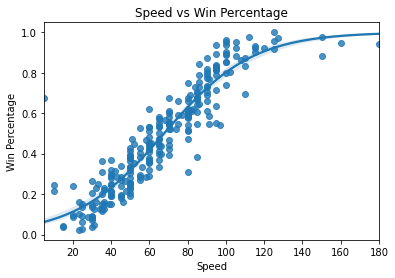

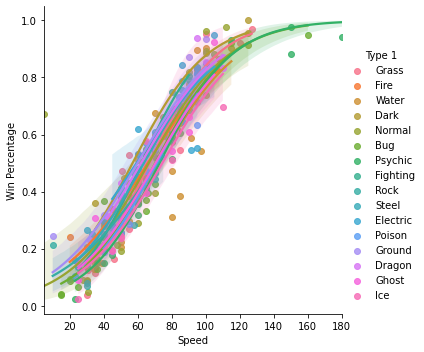

In [138]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

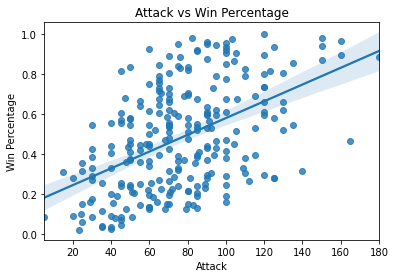

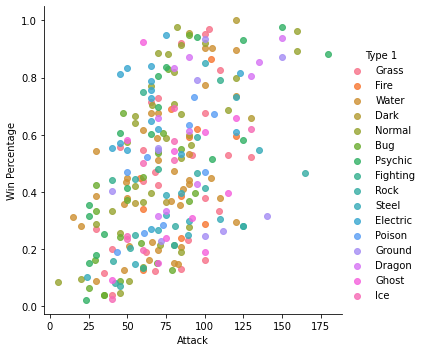

In [139]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

In [113]:
dataset = results2

## Preprocessing  Data



In [185]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values


import numpy as geek 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
y_train=geek.nan_to_num(y_train)
y_test=geek.nan_to_num(y_test)

## Feature Scaling

From there the data is standardized. It can also be normalized or transformed using PCA (which we will use later). Standardizing is important because it brings all the variables withing the same range. If variable 'A'  ranges [1-1million] and variable 'B' ranges [0-1], variable 'A' will completly dominate 'B'. 'B' would essentially become negligible. Thus, we scale 'A' to capture the variances of each vairable.  For this data I did not use feature scaling. 

In [186]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Regression Models

I put each regression model into a function so that I don't have to rewrite the code when I change the dimensionality of the data. You will notice that the code looks pretty much identical for each model. This is because I am a template that works very well for easy implementation! Feel free to use this structure! The only difference is the library we are using and when we initialize the regressor object. 

## Multiple Linear Regression

In [187]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.7205713481626326


0.12852203653550617

## Polynomial Regression

## SVM

In [188]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred= regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_svm(X_train, X_test, y_train, y_test)

0.7032742750997358


0.11781083093259824

## Decision Tree Regression

In [189]:
#feature scaling not needed

def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

0.9999105968340545


0.08534211699263392

## Random Forest

In [190]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_randomforest(X_train, X_test, y_train, y_test)
    
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (Random Forest Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

0.9818289795778443


0.07263019310747885

## XGBoost

In [193]:

def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_xgboost(X_train, X_test, y_train, y_test)


0.9986271093882727


0.06777672379445747

In [194]:
#store all the ML results in an array
all_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#all_stats

0.7205713481626326
0.7032742750997358
0.9999105968340545
0.9818289795778443
0.9986271093882727


# Principle Component Analysis 

Principle component analysis (PCA) is a dimensionality reduction technique. It uses linear algebra to tranform the data into a new space of principle components. Each principle component explains some variance of the dataset. The goal of this technique is to reduce the amount of features we are using for our model and simplify. The principle components consist of component loadings. The loadings are the correlation coefficients between the variables and factors.

In [195]:
#PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

#loadings vectors
#print(pca.components_.T * np.sqrt(pca.explained_variance_))

This is the variance explained by the principle components
[0.41323128 0.18686069 0.16567125]


One you look at how much variance each independent variable provide, decide how many components you want for the model. The more components the more variance the model will have.  Re-run the code but change n_components from 2 to the desired number. 

Run the machine learning algorithms using the data after PCA. 

In [196]:
# run PCA transformed data on ML algos
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

0.6388052230095989
0.6271606317531688
0.9999105968340545
0.9473351118165189
0.9968932465471604


In [198]:
# reduce the features to only speed and attack. 
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_train=geek.nan_to_num(y_train)
y_test=geek.nan_to_num(y_test)
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]

0.8196037468478579


/Users/carlosaguirreorozco/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8151198296324915
0.9907501015233202
0.9668521355247514
0.986509529396159


<ipython-input-190-5eba7e685d26>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


## Validation 

So far we have fited our data to various regression models and predicted the likilhood of a pokemon winning a battle. The question still remains, how do we know how accurate our predictions are? Well, there are many metrics that the Sklearn library provides us. If you have looked through the code you will see that I used mean absolute error. This gives the average amount our predictions were off. Other metrics are as follows. 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R Squared
5. Explained Variance Score


In [199]:
#compare results from the 3 trials 
ml_results = pd.DataFrame({'All Factors': all_stats, 'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

,All Factors,Reduced Factors,PCA
Linear,0.128522,0.098819,0.134385
SVM,0.117811,0.098060,0.130474
Decision Tree,0.085342,0.099737,0.141835
Random Forest,0.072630,0.075261,0.125300
XGBoost,0.067777,0.081650,0.114339


The above table provides a comparision of the mean absolute error for each machine learning model and the different dimensionality approaches we took.  **The model with the least error was the XGBoost with reduced factors**. This was the case where we only used attack and speed to predict the win percentage. All models performed significantly worse under PCA. I did not expect these results. It could be because of a combiantion of the parameters I am using for each of the models. I definetly didnt put very much effort into trying to optomize the results. To correct the issue, we would need to run a **grid search with k-folds cross validation*. 

Utilizamos el siguiente tutorial para apoyarnos:
https://www.kaggle.com/mmetter/pokemon-data-analysis-tutorial
